In [88]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


# **Membaca Dataset Loan Predictor Based On Customer Behavior**

In [89]:
url = 'https://drive.google.com/file/d/1L9xs7hydgnukyHi5-gRZT2FWTn0x8j2_/view?usp=sharing'

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
file_path = '/content/drive/My Drive/IDX Partners - Data Scientist - Faridatul Husna/loan_data_2007_2014.csv'

In [92]:
df = pd.read_csv(file_path)

In [93]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Descriptive Statistics Analytics**

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [95]:
# mengetahui jumlah kolom dan baris
jumlah_baris, jumlah_kolom = df.shape

print("Jumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 466285
Jumlah Kolom: 75


Untuk proses prediksi risiko kredit dari banyak kolom pada data yang tersedia, dapat dipilih beberapa fitur yang sangat berpengaruh.

| Kolom                 | Keterangan                                   |
| --------------------- | -------------------------------------- |
| `loan_amnt`           | Jumlah pinjaman                        |
| `term`                | Lama pinjaman (36 bulan, 60 bulan)     |
| `int_rate`            | Suku Bunga pinjaman                         |
| `installment`         | Cicilan bulanan                        |
| `grade`               | Skor risiko (bisa jadi prediktor kuat) |
| `emp_length`          | Lama bekerja (semakin lama = semakin stabil)          |
| `home_ownership`      | Status kepemilikan rumah (own/rent)                   |
| `annual_inc`          | Pendapatan tahunan                                    |
| `verification_status` | Status verifikasi pendapatan                          |
| `dti`                 | Debt-to-income ratio, semakin tinggi = makin berisiko |
| `purpose`             | Tujuan pinjaman (debt consolidation, car, dll)        |
| `open_acc`               | Jumlah akun aktif                                          |
| `pub_rec`                | Catatan publik negatif (misal: bangkrut)                   |
| `revol_bal`              | Saldo kredit bergulir (misal: kartu kredit)                |
| `revol_util`             | Persentase penggunaan limit kartu kredit                   |
| `total_acc`              | Jumlah total akun kredit                                   |
| `delinq_2yrs`            | Jumlah keterlambatan dalam 2 tahun terakhir                |
| `inq_last_6mths`         | Jumlah inkuiri kredit baru (indikasi pengajuan utang baru) |
| `loan_status`            | Status Pinjaman (label)                    |

In [96]:
# daftar kolom penting
kolom_penting = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
    'emp_length', 'home_ownership', 'annual_inc',
    'verification_status', 'dti', 'purpose', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc','delinq_2yrs',
    'inq_last_6mths', 'loan_status'
]

df = df[kolom_penting]

In [97]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,dti,purpose,open_acc,pub_rec,revol_bal,revol_util,total_acc,delinq_2yrs,inq_last_6mths,loan_status
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,27.65,credit_card,3.0,0.0,13648,83.7,9.0,0.0,1.0,Fully Paid
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,1.00,car,3.0,0.0,1687,9.4,4.0,0.0,5.0,Charged Off
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,8.72,small_business,2.0,0.0,2956,98.5,10.0,0.0,2.0,Fully Paid
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,20.00,other,10.0,0.0,5598,21.0,37.0,0.0,1.0,Fully Paid
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,17.94,other,15.0,0.0,27783,53.9,38.0,0.0,0.0,Current


In [98]:
# melihat deskripsi kolom kategorikal & nilai unique
df.select_dtypes(include='object').nunique()

,0
term,2
grade,7
emp_length,11
home_ownership,6
verification_status,3
purpose,14
loan_status,9


In [99]:
# cek nilai unique di kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

term: [' 36 months' ' 60 months']
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
purpose: ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
loan_status: ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [100]:
# cek nilai dalam kelas

df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


Dari data di atas, terlihat banyak nilai di dalam target variabel.

In [101]:
df_clean = df.copy()

In [102]:
good = ['Current', 'Fully Paid', 'In Grace Period']
df_clean['loan_status'] = np.where(df_clean['loan_status'].isin(good), 1, 0)
df_clean['loan_status'].value_counts()/len(df_clean)*100

,count
loan_status,
1,88.381784
0,11.618216


In [103]:
df_clean['loan_status'].value_counts()

,count
loan_status,
1,412111
0,54174


In [104]:
df_clean['term'] = df_clean['term'].apply(lambda term: int(term[:3]))

**Kesimpulan dari Descriptive Statistics**

1. Dataset terdiri dari 466285 baris dan 75 kolom, namun untuk proses modeling nantinya hanya digunakan beberapa kolom yang berpengaruh dallam prediksi risiko kredit.
2. Fitur 'loan_status' menjadi target variabel, namun karena terdapat beberapa kelas yang ada pada kolom tersebut, maka dikategorikan menjadi Good Risk dan Bad Risk.

# **Eksploratory Data Analysis**

In [105]:
nums = df_clean.select_dtypes(include=np.number).columns
cats = df_clean.select_dtypes(exclude=np.number).columns

In [106]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
installment,466285.0,432.061201,243.485550,15.67,256.69,379.89,566.58,1409.99
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
open_acc,466256.0,11.187069,4.987526,0.00,8.00,10.00,14.00,84.00
pub_rec,466256.0,0.160564,0.510863,0.00,0.00,0.00,0.00,63.00
revol_bal,466285.0,16230.203487,20676.245152,0.00,6413.00,11764.00,20333.00,2568995.00
revol_util,465945.0,56.176947,23.732628,0.00,39.20,57.60,74.70,892.30
total_acc,466256.0,25.064430,11.600141,1.00,17.00,23.00,32.00,156.00


In [107]:
df[cats].describe().T

,count,unique,top,freq
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
purpose,466285,14,debt_consolidation,274195


In [108]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   term                 466285 non-null  int64  
 2   int_rate             466285 non-null  float64
 3   installment          466285 non-null  float64
 4   grade                466285 non-null  object 
 5   emp_length           445277 non-null  object 
 6   home_ownership       466285 non-null  object 
 7   annual_inc           466281 non-null  float64
 8   verification_status  466285 non-null  object 
 9   dti                  466285 non-null  float64
 10  purpose              466285 non-null  object 
 11  open_acc             466256 non-null  float64
 12  pub_rec              466256 non-null  float64
 13  revol_bal            466285 non-null  int64  
 14  revol_util           465945 non-null  float64
 15  total_acc        

In [109]:
df_eda = df.copy()

In [110]:
df_eda['risk'] = np.where((df_eda['loan_status'] =='Charged Off') | (df_eda['loan_status'] =='Default') | (df_eda['loan_status'] =='Late (31-120 days)') | (df_eda['loan_status'] =='Late (16-30 days)') | (df_eda['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),'Bad Risk','Good Risk')

In [111]:
loan_by_status = df_eda.groupby('loan_status').size().reset_index()
loan_by_status.columns = ['Target','Total Applicants']
loan_by_status['%'] = round(loan_by_status['Total Applicants']*100/sum(loan_by_status['Total Applicants']),2)
loan_by_status.sort_values(by='Total Applicants', ascending=False).style.background_gradient(cmap='Greens')

,Target,Total Applicants,%
1,Current,224226,48.090000
5,Fully Paid,184739,39.620000
0,Charged Off,42475,9.110000
8,Late (31-120 days),6900,1.480000
6,In Grace Period,3146,0.670000
4,Does not meet the credit policy. Status:Fully Paid,1988,0.430000
7,Late (16-30 days),1218,0.260000
2,Default,832,0.180000
3,Does not meet the credit policy. Status:Charged Off,761,0.160000


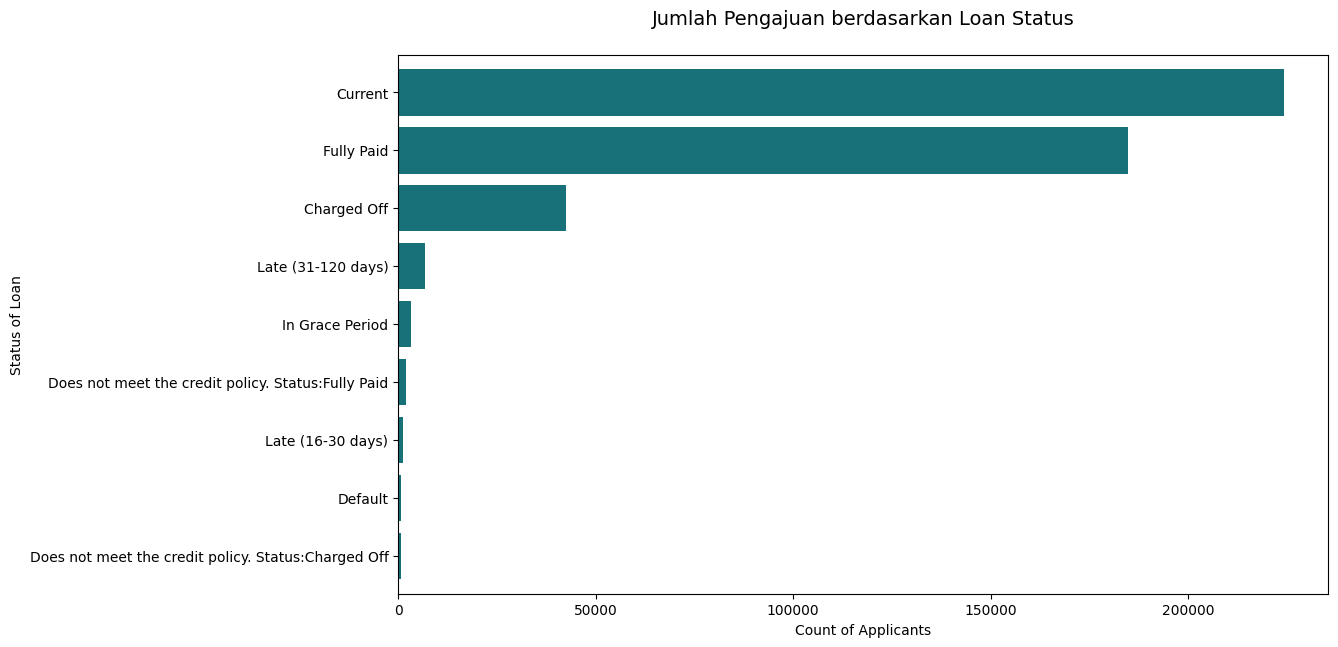

In [112]:
loan_status_counts = df_eda['loan_status'].value_counts().sort_values(ascending=True)

# Membuat plot
fig = plt.figure(figsize=(12, 7))
loan_status_counts.plot(kind='barh', color='#187078', width=0.8)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Pengajuan berdasarkan Loan Status\n', fontsize=14)
plt.ylabel('Status of Loan')
plt.xlabel('Count of Applicants')

# Menampilkan plot
plt.show()


In [113]:
loan_risk = df_eda.groupby('risk').size().reset_index()
loan_risk.columns = ['Target','Total']
loan_risk['%'] = round(loan_risk['Total']*100/sum(loan_risk['Total']),2)
loan_risk.sort_values(by='Total', ascending=False)

,Target,Total,%
1,Good Risk,414099,88.81
0,Bad Risk,52186,11.19


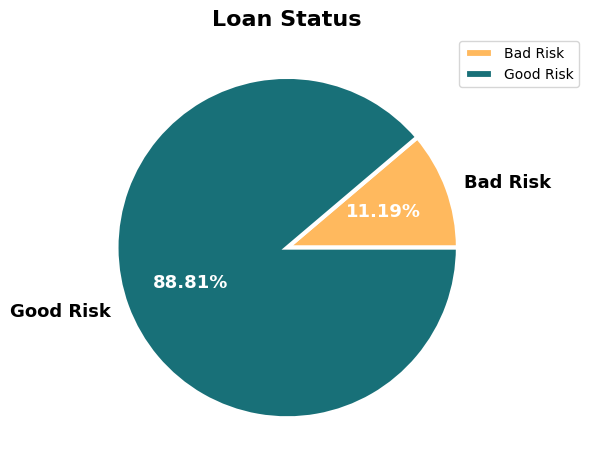

In [114]:
labels = ['Bad Risk', 'Good Risk']
colors = ["#ffb95e", "#187078"]

sns.set_palette(sns.color_palette(colors))

# Buat plot pie yang baru
fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = plt.pie(loan_risk['Total'], labels=labels, autopct='%.2f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'fontsize': 13, 'fontweight': 'bold'})

plt.setp(pcts, color='white', fontweight=600)
plt.setp(texts, fontweight=600)

plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))

ax.set_title('Loan Status', fontsize=16, fontweight='bold', color='000000')

plt.tight_layout()
plt.show()

Terlihat bahwa datasetnya memiliki target variabel yang tidak seimbang.

## **Distribusi Histogram**

### Risk Status by Term

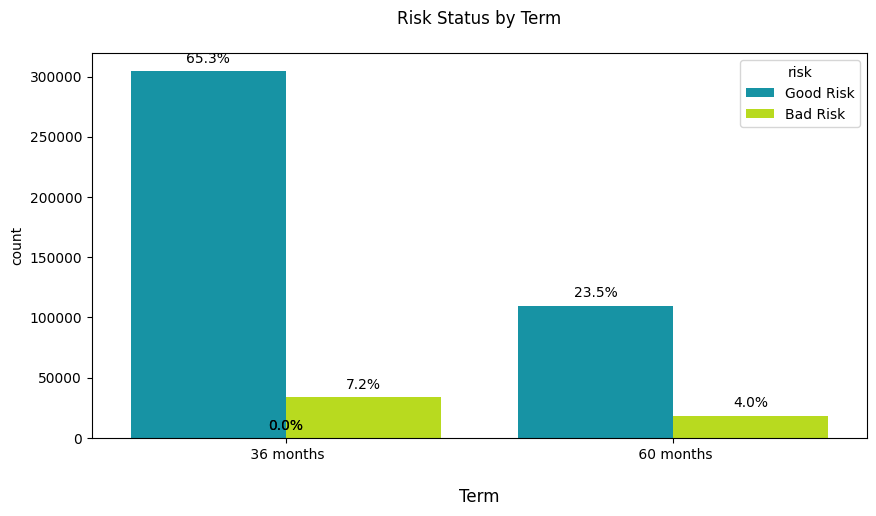

In [115]:
plt.figure(figsize=(10,5))
fig = sns.countplot(data=df_eda, x='term', hue='risk', palette='nipy_spectral')
plt.title('Risk Status by Term\n', fontsize=12)
plt.xlabel('\nTerm', fontsize=12)

# Menghitung total untuk setiap grup
total = len(df_eda['term'])

# Menambahkan persentase di atas setiap bar
for p in fig.patches:
    height = p.get_height()
    fig.annotate(f'{height/total:.1%}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')

plt.show()

### Risk Status by Home Ownership

In [116]:
df_eda['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [117]:
def cat_owns(row):
    ownership = row['home_ownership']
    if ownership in ['MORTGAGE', 'RENT', 'OWN']:
        return ownership
    return 'OTHERS'

df_eda['home_ownership'] = df_eda.apply(cat_owns, axis=1)

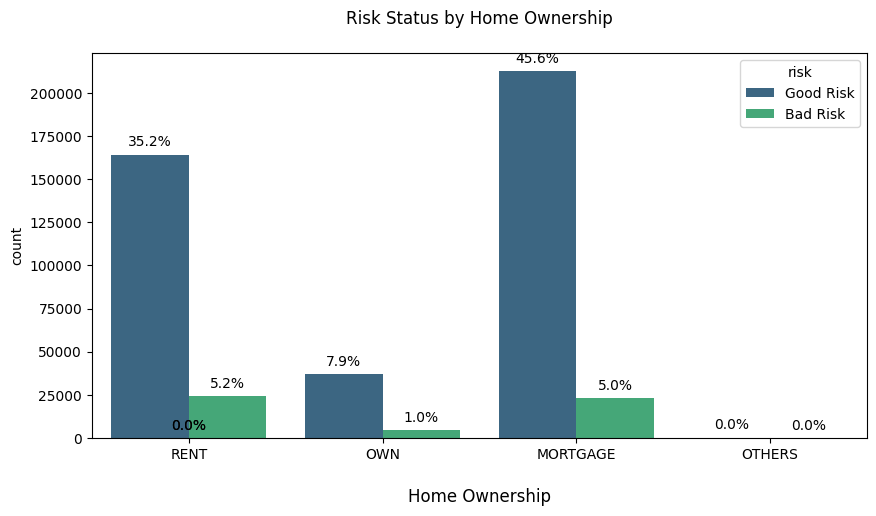

In [118]:
plt.figure(figsize=(10,5))
fig = sns.countplot(data=df_eda, x='home_ownership', hue='risk', palette='viridis')
plt.title('Risk Status by Home Ownership\n', fontsize=12)
plt.xlabel('\nHome Ownership', fontsize=12)

# Menghitung total untuk setiap grup
total = len(df_eda['home_ownership'])

# Menambahkan persentase di atas setiap bar
for p in fig.patches:
    height = p.get_height()
    fig.annotate(f'{height/total:.1%}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')

plt.show()

### Risk Status by Purpose

In [119]:
df_eda['purpose'].value_counts()

,count
purpose,
debt_consolidation,274195
credit_card,104157
home_improvement,26537
other,23690
major_purchase,9828
small_business,7013
car,5397
medical,4602
moving,2994


# **Data Preparation**

### **Feature Selection**

In [120]:
df_clean.columns.tolist()

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'dti',
 'purpose',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'delinq_2yrs',
 'inq_last_6mths',
 'loan_status']

In [121]:
df_sel = df_clean.copy()

In [122]:
def woe(raw, feature_name):
    # probability analysis
    feature_name = raw.groupby(feature_name).agg(num_observation=('loan_status','count'),
                                                good_loan_prob=('loan_status','mean')).reset_index()

    # find the feature proportion
    feature_name['feat_proportion'] = feature_name['num_observation']/(feature_name['num_observation'].sum())

    # find number of approved loan behavior
    feature_name['num_loan_approve'] = feature_name['feat_proportion'] * feature_name['num_observation']

    # find number of declined loan behavior
    feature_name['num_loan_decline'] = (1-feature_name['feat_proportion']) * feature_name['num_observation']

    # find approved loan proportion
    feature_name['prop_loan_approve'] = feature_name['num_loan_approve'] / (feature_name['num_loan_approve'].sum())

    # find declined loan proportion
    feature_name['prop_loan_decline'] = feature_name['num_loan_decline'] / (feature_name['num_loan_decline'].sum())

    # calculate weight of evidence
    feature_name['weight_of_evidence'] = np.log(feature_name['prop_loan_approve'] / feature_name['prop_loan_decline'])

    # sort values by weight of evidence
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)

    # calculate information value
    feature_name['information_value'] = (feature_name['prop_loan_approve']-feature_name['prop_loan_decline']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()

    #Show
    feature_name = feature_name.drop(['feat_proportion','num_loan_approve','num_loan_decline','prop_loan_approve','prop_loan_decline'],axis = 1)

    return feature_name

#### Categorical

In [123]:
df_clean.describe(include = 'O')

,grade,emp_length,home_ownership,verification_status,purpose
count,466285,445277,466285,466285,466285
unique,7,11,6,3,14
top,B,10+ years,MORTGAGE,Verified,debt_consolidation
freq,136929,150049,235875,168055,274195


In [124]:
woe(df_sel,'grade')

,grade,num_observation,good_loan_prob,weight_of_evidence,information_value
0,G,3322,0.679711,-3.660567,0.292639
1,F,13229,0.741401,-2.257091,0.292639
2,E,35757,0.789775,-1.211753,0.292639
3,A,74867,0.959328,-0.377550,0.292639
4,D,76888,0.835787,-0.345737,0.292639
5,C,125293,0.878493,0.275309,0.292639
6,B,136929,0.917643,0.398836,0.292639


In [125]:
woe(df_sel,'emp_length')

,emp_length,num_observation,good_loan_prob,weight_of_evidence,information_value
0,9 years,17888,0.881093,-1.513681,0.879587
1,8 years,22395,0.884349,-1.278372,0.879587
2,6 years,26112,0.876800,-1.115987,0.879587
3,7 years,26180,0.883613,-1.113224,0.879587
4,4 years,28023,0.882240,-1.040787,0.879587
5,1 year,29622,0.877017,-0.981455,0.879587
6,5 years,30774,0.878696,-0.940527,0.879587
7,< 1 year,36265,0.867944,-0.763008,0.879587
8,3 years,36596,0.882446,-0.753113,0.879587
9,2 years,41373,0.881251,-0.618666,0.879587


In [126]:
df_sel['home_ownership'] = np.where(df_sel['home_ownership']=='ANY','OTHER',
                       np.where(df_sel['home_ownership']=='NONE','OTHER',df_sel['home_ownership']))


woe(df_sel,'home_ownership')

,home_ownership,num_observation,good_loan_prob,weight_of_evidence,information_value
0,OTHER,233,0.669528,-7.308027,0.311741
1,OWN,41704,0.885359,-2.027519,0.311741
2,RENT,188473,0.866501,-0.095003,0.311741
3,MORTGAGE,235875,0.897594,0.316429,0.311741


In [127]:
woe(df_sel,'verification_status')

,verification_status,num_observation,good_loan_prob,weight_of_evidence,information_value
0,Not Verified,148237,0.895262,-0.075220,0.007663
1,Source Verified,149993,0.891342,-0.057908,0.007663
2,Verified,168055,0.867008,0.114596,0.007663


In [128]:
woe(df_sel,'purpose')

,purpose,num_observation,good_loan_prob,weight_of_evidence,information_value
0,renewable_energy,351,0.840456,-6.796087,1.409257
1,educational,422,0.637441,-6.611715,1.409257
2,house,2269,0.843543,-4.925653,1.409257
3,wedding,2343,0.860009,-4.893401,1.409257
4,vacation,2487,0.872135,-4.833445,1.409257
5,moving,2994,0.834335,-4.646819,1.409257
6,medical,4602,0.856584,-4.213461,1.409257
7,car,5397,0.900130,-4.052385,1.409257
8,small_business,7013,0.766862,-3.786951,1.409257
9,major_purchase,9828,0.891941,-3.443333,1.409257


#### Numerical

In [129]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
term,466285.0,42.605334,10.719040,36.00,36.00,36.00,60.00,60.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
installment,466285.0,432.061201,243.485550,15.67,256.69,379.89,566.58,1409.99
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
open_acc,466256.0,11.187069,4.987526,0.00,8.00,10.00,14.00,84.00
pub_rec,466256.0,0.160564,0.510863,0.00,0.00,0.00,0.00,63.00
revol_bal,466285.0,16230.203487,20676.245152,0.00,6413.00,11764.00,20333.00,2568995.00
revol_util,465945.0,56.176947,23.732628,0.00,39.20,57.60,74.70,892.30


In [130]:
df_sel['loan_amnt_fs'] = pd.cut(df_sel['loan_amnt'], 5)
woe(df_sel,'loan_amnt_fs')

,loan_amnt_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(28100.0, 35000.0]",34906,0.875867,-1.391294,0.249414
1,"(21200.0, 28100.0]",52172,0.882504,-0.948559,0.249414
2,"(465.5, 7400.0]",103603,0.884096,-0.129926,0.249414
3,"(14300.0, 21200.0]",118918,0.883458,0.051086,0.249414
4,"(7400.0, 14300.0]",156686,0.886116,0.442000,0.249414


In [131]:
woe(df_sel,'term')

,term,num_observation,good_loan_prob,weight_of_evidence,information_value
0,60,128332,0.853458,-1.378129,0.72423
1,36,337953,0.895346,0.558444,0.72423


In [132]:
df_sel['int_rate_fs'] = pd.cut(df_sel['int_rate'], 5)
woe(df_sel,'int_rate_fs')

,int_rate_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(21.932, 26.06]",23189,0.761870,-1.899708,0.284226
1,"(17.804, 21.932]",57785,0.809241,-0.905362,0.284226
2,"(5.399, 9.548]",83978,0.959859,-0.465268,0.284226
3,"(13.676, 17.804]",147973,0.860704,0.284398,0.284226
4,"(9.548, 13.676]",153360,0.911020,0.337225,0.284226


In [133]:
df_sel['annual_inc_fs'] = pd.cut(df_sel['annual_inc'], 5)
woe(df_sel,'annual_inc_fs')

,annual_inc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(3001137.6, 4500758.4]",1,1.000000,-22.467446,10.682641
1,"(4500758.4, 6000379.2]",4,1.000000,-21.081145,10.682641
2,"(6000379.2, 7500000.0]",4,1.000000,-21.081145,10.682641
3,"(1501516.8, 3001137.6]",10,1.000000,-20.164841,10.682641
4,"(-5602.104, 1501516.8]",466262,0.883821,0.693160,10.682641


In [134]:
df_sel['dti_fs'] = pd.cut(df_sel['dti'], 5)
woe(df_sel,'dti_fs')

,dti_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(31.992, 39.99]",16407,0.864814,-2.306884,0.293918
1,"(-0.04, 7.998]",59690,0.901642,-0.914269,0.293918
2,"(23.994, 31.992]",80361,0.863827,-0.564727,0.293918
3,"(7.998, 15.996]",154680,0.897110,0.304006,0.293918
4,"(15.996, 23.994]",155147,0.876072,0.308521,0.293918


In [135]:
df_sel['delinq_2yrs_fs'] = np.where(df_sel['delinq_2yrs'] > 3, 3,
                                 np.where(df_sel['delinq_2yrs'] == 2, 2,
                                 np.where(df_sel['delinq_2yrs'] == 1,1,0)))
woe(df_sel,'delinq_2yrs_fs')

,delinq_2yrs_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,3,5084,0.881786,-5.406375,2.038543
1,2,16310,0.880135,-4.216053,2.038543
2,1,56224,0.885654,-2.885602,2.038543
3,0,388667,0.883733,0.712284,2.038543


In [136]:
df_sel['inq_last_6mths_fs'] = np.where(df_sel['inq_last_6mths'] == 0,0,
                                    np.where((df_sel['inq_last_6mths'] > 0)&(df_sel['inq_last_6mths'] <=3),1,
                                    np.where((df_sel['inq_last_6mths']>3)&(df_sel['inq_last_6mths']<=6),2,
                                    np.where((df_sel['inq_last_6mths']>6)&(df_sel['inq_last_6mths']<=9),3,4))))

# show
woe(df_sel,'inq_last_6mths_fs')

,inq_last_6mths_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,4,124,0.000000,-8.142665,0.189219
1,3,367,0.147139,-7.057064,0.189219
2,2,11197,0.737162,-3.615505,0.189219
3,1,213099,0.869033,-0.083028,0.189219
4,0,241498,0.905237,0.161047,0.189219


In [137]:
df_sel['open_acc_fs'] = pd.cut(df_sel['open_acc'], 5)
woe(df_sel,'open_acc_fs')

,open_acc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(67.2, 84.0]",4,0.500000,-12.858617,1.830315
1,"(50.4, 67.2]",22,1.000000,-11.153831,1.830315
2,"(33.6, 50.4]",898,0.886414,-7.442823,1.830315
3,"(16.8, 33.6]",61622,0.886907,-3.074394,1.830315
4,"(-0.084, 16.8]",403710,0.883401,0.672364,1.830315


In [138]:
df_sel['pub_rec_fs'] = pd.cut(df_sel['pub_rec'], 5)
woe(df_sel,'pub_rec_fs')

,pub_rec_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(25.2, 37.8]",1,1.000000,-22.703740,10.838586
1,"(37.8, 50.4]",2,1.000000,-22.010591,10.838586
2,"(50.4, 63.0]",2,1.000000,-22.010591,10.838586
3,"(12.6, 25.2]",10,1.000000,-20.401136,10.838586
4,"(-0.063, 12.6]",466241,0.883869,0.693155,10.838586


In [139]:
df_sel['revol_bal_fs'] = np.where((df_sel['revol_bal']>=0)&(df_sel['revol_bal']<=5000),0,
                               np.where((df_sel['revol_bal']>5000)&(df_sel['revol_bal']<=10000),1,
                               np.where((df_sel['revol_bal']>10000)&(df_sel['revol_bal']<=15000),2,3)))

# show
woe(df_sel,'revol_bal_fs')

,revol_bal_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,82590,0.875239,-0.576520,0.197731
1,2,88805,0.882011,-0.487635,0.197731
2,1,115537,0.880480,-0.151038,0.197731
3,3,179353,0.890813,0.489550,0.197731


In [140]:
df_sel['revol_util_fs'] = np.where((df_sel['revol_util']>=0)&(df_sel['revol_util']<=20),0,
                                np.where((df_sel['revol_util']>20)&(df_sel['revol_util']<=40),1,
                                np.where((df_sel['revol_util']>40)&(df_sel['revol_util']<=60),2,
                                np.where((df_sel['revol_util']>60)&(df_sel['revol_util']<=80),3,4))))

# show
woe(df_sel,'revol_util_fs')

,revol_util_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,0,37402,0.907438,-1.219335,0.15665
1,1,83492,0.901679,-0.302619,0.15665
2,4,84402,0.858913,-0.289398,0.15665
3,2,129397,0.889541,0.263259,0.15665
4,3,131592,0.876117,0.286617,0.15665


In [141]:
df_sel['total_acc_fs'] = pd.cut(df_sel['total_acc'], 5)
woe(df_sel,'total_acc_fs')

,total_acc_fs,num_observation,good_loan_prob,weight_of_evidence,information_value
0,"(125.0, 156.0]",2,1.000000,-12.936214,1.034434
1,"(94.0, 125.0]",28,0.964286,-10.297101,1.034434
2,"(63.0, 94.0]",1221,0.904177,-6.519318,1.034434
3,"(32.0, 63.0]",107819,0.891911,-1.778175,1.034434
4,"(0.845, 32.0]",357186,0.881370,0.609391,1.034434


Fitur yang akan dihilangkan karena memiliki:
- Value <0,02 (tidak berguna untuk prediksi)
- value > 0.5 (prediksi mencurigakan)
- fitur yang tidak masuk akal

In [142]:
df_sel.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,21008
home_ownership,0
annual_inc,4
verification_status,0
dti,0


In [143]:
drop_list = ['emp_length','installment', 'verification_status', 'purpose', 'term','annual_inc', 'delinq_2yrs', 'total_acc','open_acc', 'pub_rec',
             ]

print(len(drop_list))

10


In [144]:
df_encode = df_clean.copy()

In [145]:
df_encode.drop(['emp_length', 'installment', 'verification_status', 'purpose', 'term','annual_inc', 'delinq_2yrs', 'total_acc','open_acc', 'pub_rec',
                ], axis = 1, inplace=True)

In [146]:
nums = df_encode.select_dtypes(include=np.number).columns
cats = df_encode.select_dtypes(exclude=np.number).columns

In [147]:
for cat in ['grade', 'home_ownership']:
  onehots = pd.get_dummies(df_clean[cat], prefix=cat)
  df_encode = df_encode.join(onehots)

df_encode = df_encode.drop(columns=['grade', 'home_ownership'], axis =1)
df_encode.head()

,loan_amnt,int_rate,dti,revol_bal,revol_util,inq_last_6mths,loan_status,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,10.65,27.65,13648,83.7,1.0,1,False,True,False,False,False,False,False,False,False,False,False,False,True
1,2500,15.27,1.00,1687,9.4,5.0,0,False,False,True,False,False,False,False,False,False,False,False,False,True
2,2400,15.96,8.72,2956,98.5,2.0,1,False,False,True,False,False,False,False,False,False,False,False,False,True
3,10000,13.49,20.00,5598,21.0,1.0,1,False,False,True,False,False,False,False,False,False,False,False,False,True
4,3000,12.69,17.94,27783,53.9,0.0,1,False,True,False,False,False,False,False,False,False,False,False,False,True


In [148]:
from sklearn.preprocessing import LabelEncoder

#Label encoding

le = LabelEncoder()

columns = [ 'loan_amnt', 'int_rate', 'loan_status', 'dti', 'inq_last_6mths',
       'revol_bal', 'revol_util'
]

for col in columns:
    df_encode[col] = le.fit_transform(df_clean[col])

In [149]:
print("Jumlah Baris :", df_encode.shape[0])
print("Jumlah Kolom :", df_encode.shape[1])

Jumlah Baris : 466285
Jumlah Kolom : 20


## **Handling Missing Value**

In [150]:
df_encode.isnull().sum()

,0
loan_amnt,0
int_rate,0
dti,0
revol_bal,0
revol_util,0
inq_last_6mths,0
loan_status,0
grade_A,0
grade_B,0
grade_C,0


Tidak ada nilai yang kosong.

# **Modelling**

In [151]:
df_model = df_encode.copy()

## **Split Train & Test Data**

In [152]:
X = df_model.drop(labels=['loan_status'],axis=1)
y = df_model[['loan_status']]

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

## **Logistic Regression**

In [154]:
from sklearn.preprocessing import StandardScaler

# standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# inisialisasi model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# latih model
logreg_model.fit(X_train_scaled, y_train)

# prediksi
y_pred = logreg_model.predict(X_test_scaled)

# evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.8842486024334101

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.00      0.01     16252
           1       0.88      1.00      0.94    123634

    accuracy                           0.88    139886
   macro avg       0.89      0.50      0.47    139886
weighted avg       0.89      0.88      0.83    139886



## **Random Forest**

In [156]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=420)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = rf_model.score(X_test, y_test)
accuracy

0.8862645296884606

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.04      0.07     16252
           1       0.89      1.00      0.94    123634

    accuracy                           0.89    139886
   macro avg       0.79      0.52      0.51    139886
weighted avg       0.86      0.89      0.84    139886



## **XG-Boost**

In [158]:
import re

In [159]:
# Salin data untuk XGBoost
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()

# Pastikan kolom bertipe string dan bersih dari karakter aneh
X_train_xgb.columns = [re.sub(r"[\[\]<>]", "", str(col)) for col in X_train_xgb.columns]
X_test_xgb.columns = [re.sub(r"[\[\]<>]", "", str(col)) for col in X_test_xgb.columns]

In [160]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_xgb, y_train)
y_pred = xgb_model.predict(X_test_xgb)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8873654261327081

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.04      0.07     16252
           1       0.89      1.00      0.94    123634

    accuracy                           0.89    139886
   macro avg       0.86      0.52      0.51    139886
weighted avg       0.88      0.89      0.84    139886



In [162]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[   618  15634]
 [   122 123512]]


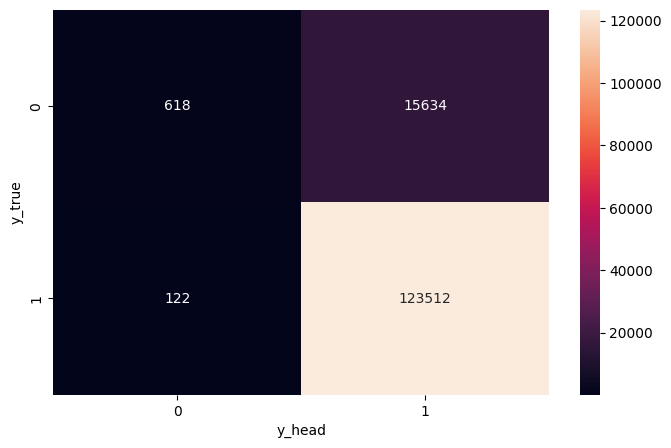

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

## **Decision Tree**

In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))


In [165]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.80
Accuracy (Train Set): 1.00
Precision (Test Set): 0.89
Recall (Test Set): 0.88
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.54
roc_auc (train-proba): 1.00


In [166]:
# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Memprediksi label untuk data pengujian
y_pred = dt_model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 0.80
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.17      0.20      0.18     16252
           1       0.89      0.88      0.89    123634

    accuracy                           0.80    139886
   macro avg       0.53      0.54      0.53    139886
weighted avg       0.81      0.80      0.80    139886



In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

## **Model Result**

In [169]:
def eval(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)

    return accuracy, precision, recall, f1, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']

    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)

    return df_model


In [170]:
model_list_base = [logreg_model, rf_model, xgb_model, dt_model]

results = score_all_classification(model_list_base, X_train, y_train, X_test, y_test)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC (Test),AUC (Train)
0,Logistic Regression,0.8301,0.8871,0.9256,0.9059,0.5181,0.5167
1,Random Forest,0.8863,0.8876,0.9977,0.9394,0.6553,1.0000
2,XGBoost,0.8874,0.8876,0.9990,0.9400,0.6912,0.7461
3,Decision Tree,0.7985,0.8924,0.8778,0.8851,0.5364,1.0000
